# Batch Gradient Descent for Linear Regression

**Linear Regression** \
Linear Regression is the relation between a dependent varaible and an independent varaible or more.\
The goal is to find a linear equation that best describes the relationship between the input features \
and the output variable 


**Linear Regression Equation** \
$\hat{y} = {w*x} + {b}$ \
$\hat{y}$ -> **dependent variable**\
${w}$ -> **coefficient/slope/weight**\
${x}$ -> **independent variable** \
${b}$ -> **y-intercept** / **bias**

**Gradient Descent**\
Its an optimized algorithm used to find the optimal values of the **coefficients** and for **y-intercept**\
The goal is to iteratively update the values of ${w}$ and ${b}$ in a way that minimizes the **loss function**\
By minimizing the loss function the algorithm finds the best-fit that passes throught the data points allowing the model\
to make accurate predictions for new data points

- Calculate the Loss Function
- Learning Rate: is sensitive
- Calculate Derivate: Intercept and Slope
- Calculate Step SIze
- Calculate hte New Intercept and New Slope
- Number of Iterations: normally the maximum number is 1000

**Loss Function**\
Use the MSE (Mean Square Error)

## Steps

### Training
Initialize the **weight** as zero\
Initialize the **bias** as zero

In [173]:
import numpy as np

In [1]:
class LinearRegression:
    
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weight = None
        self.bias = None
        
    def fit(self, X, y): # used for the training
        
        # Initialization and previous loss value -------------------------------
        n_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0
        # ---------------------------------------------------------------------
        
        for i in range(self.n_iter):
            # predict the result by the linear regression equation
            y_predict = np.dot(X, self.weight) + self.bias            
            
            # calculate the derivative of weight and bias
            dw = (1/n_samples) * np.dot(X.T, (y_predict - y))
            db = (1/n_samples) * np.sum(y_predict - y)
            
            # Step Size
            step_w = dw * self.lr
            step_b = db * self.lr
            
            # Update the weight and bias
            self.weight = self.weight - step_w
            self.bias = self.bias - step_b
            
            # Calculate the current loss (MSE)
            loss = np.mean((y_predict - y)**2)
             
        
    def predict(self, X): # used for the predictions 
        y_pred = np.dot(X, self.weight) + self.bias
        return y_pred


In [233]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [234]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

In [235]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1234)

In [236]:
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_valid)

In [237]:
def mse(y_valid, predictions):
    return np.mean((y_valid-predictions)**2)

In [238]:
mse = mse(y_valid, predictions)

In [239]:
mse

305.7719958301902

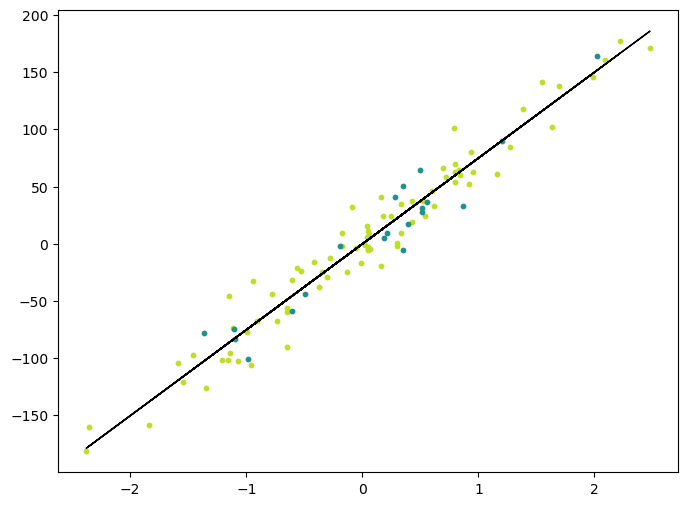

In [240]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_valid, y_valid, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=1, label='Prediction')
plt.show()